In [13]:
# Setup, zapewnia czytelność całości - NIE MODYFIKOWAĆ
# URUCHOMIĆ JAKO PIERWSZE!
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import random
import numpy as np

def pretty_print(text='text'):
    print('\n')
    print(text.upper(), end='\n---------------\n')

TODO
* Pandas uzupelnic ~2-3h pisania + cwiczenia
* Numpy napisać ~2h pisania 
  
  

# Wstęp - co to, po co to

Skrypt ma służyć jako swego rodzaju "crash course" z zagadnień niezbędnych do pracy z danymi - czyli Python + najważniejsze biblioteki z ekosystemu (NumPy, Pandas, Matplotlib). Został przygotowany z myślą o studentach (przez studenta;), którzy potrafią programować (nie będzie tłumaczenia co robi if, for, while etc.), a po prostu nie mieli wcześniej styczności z Pythonem ani wspomnianymi bibliotekami. Może się przydać na początku takich przedmiotów jak m.in. Metody Numeryczne, Data Mining, Wstęp do analityki danych, PSAW, Wizualizacja Danych.

W skrócie, to co zostanie przedstawione to:
1. Python: składnia, lista, słownik, tuple+set
2. Numpy: UZUPELNIC
3. Pandas - Series, DataFrame - wybieranie danych, modyfikacja, przydatne sztuczki, szybkie plotowanie
4. Matplotlib - czym jest Figure, Axis, podstawy działania biblioteki, dwa podejścia do plotowania

# Python - wonsz to twój przyjaciel

TODO:
* <s>wstęp</s>
* <s>składnia</s>
* <s>lista - bardzo dokładnie</s>
* <s>dictionary, tuple</s>
* <s>working with iterables, przydatne książki + collections itertools</s>

Python - język niezwykle przyjazny początkującym, który stosunkowo szybko pozwala na robienie w nim naprawdę ciekawych rzeczy.
Obecnie jest to najpopularniejszy język na świecie (za TIOBE index), pokazujący swoje mocne strony szczególnie przy pracy z danymi, gdzie jest już standardem, tam gdzie Excel nie może.

Mimo tego, że łatwo sprawić aby program w Pythonie działał i spełniał swoje zadanie, nie można zapominać o wydajności. A ta może się diametralnie zmieniać w zależności od tego jak zapiszemy kod który efektywnie robi to samo. 

Przykład: powiedzmy że muszę wygenerować sekwencję liczb 1-10000. Zróbmy to na różne sposoby:

In [17]:
%%timeit 
# Konstrukcja w stylu C
numbers = []
for x in range(10000):
    numbers.append(x)

1.71 ms ± 77.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%%timeit
# Konstrukcja pythonowa, ale bez użycia dedykowanej biblioteki (czyli w sumie nie do końca pythonowa)
numbers = [x for x in range(10000)]

740 µs ± 8.82 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%%timeit
# Konstrukcja z użyciem NumPy - wysoce zoptymalizowanej biblioteki numerycznej
numbers = np.arange(1, 10000, 1)

7.18 µs ± 270 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Zwróć uwagę na różnicę w czasie wykonania (jednostki!) - dla dociekliwych, gdybyśmy koniecznie musieli mieć to w formie listy, to przekonwertowanie np.array na liste dalej jest szybsze!

Lekcja z tego przykładu jest następująca - jeżeli masz przed sobą jakieś zadanie, to spędź trochę czasu na wybór odpowiedniego narzędzia - na 99% twój problem jest powszechnie spotykany i ktoś już pomyślał nad narzędziami, żeby to zoptymalizować (np. nad funkcją w jakiejś bibliotece, czy dedykowaną strukturą danych) - wykorzystanie go będzie zarówno wydajniejsze jak i bardziej odporne na bugi.

Jedną z głównych zalet Pythona jest jego przejrzysta składnia - nawet nie znając specyfiki języka można śledzić na bieżąco przykłady i (jeżeli ma się jakieś doświadczenie z programowaniem) orientować się co się dzieje. Poniżej przedstawiam trochę
prostego kodu, żebyś zobaczył/a jak to wygląda.

Polecam przejrzeć wbudowane funkcje Pythona - jest ich stosunkowo niewiele, a i tak raczej na co dzień korzysta się tylko z 
niektórych, szczególnie: abs(), enumerate(), getattr(), len(), castowanie, map(), min/max, sum(), zip(): 
https://docs.python.org/3/library/functions.html

In [17]:
# Tworzenie funkcji, jeden parametr pozycyjny, drugi keyword-argument - te muszą znajdować się PO pozycyjnych
def function(x, y=1):
    return x + y

# Tworzenie listy - podstawowa struktura danych, piekielnie użyteczna
example_list = ['a', 'b', 'c']

# Iterowanie po liście
pretty_print('Iterowanie po liscie')
for element in example_list:
    print(element)

# Często zdarza się tak, że chcemy mieć szybki dostęp zarówno do elementu jak i do indeksu - funkcja enumerate() świetnie 
# się do tego sprawdza
pretty_print('Funkcja enumerate:')
for index, element in enumerate(example_list):
    print(index, element)
    
# Funkcja range(start, stop*, step*):
pretty_print('Funkcja range(start, stop*, step*):')
for number in range(0, 11, 2):
    print(number)
    
# Wywołanie funkcji (np. funkcja pretty_print)
pretty_print('Wywołanie funkcji function(1) zwraca:')
print(function(1))

# Konwersja typów
pretty_print('konwersja typów:')
word = '12'
number = 10
print(number + int(word))
print(str(number) + word)
  
# Slicing - mechanizm dzialajacy podobnie jak range, tzn string[start_index:stop_index:step]
pretty_print('Slicing')
example_string = 'BardzoDlugiPrzykladowyString'
print(example_string[0:6])
print(example_string[6:11])
print(example_string[0:-5])
print(example_string[0:-1:2])
# odwracanie stringa
print(example_string[::-1])

# Mechanizm rozpakowywania
pretty_print('mechanizm rozpakowywania')
a, b, c = [1, 2, 3]
print(a, b, c)
# uwaga, to spowoduje błąd: 
# a, b, c, d = [1, 2, 3]

# Importowanie modułu wraz z nadaniem mu aliasu
pretty_print('importowanie modułu')
import numpy as np
print(np.linspace(0, 100, 10))




ITEROWANIE PO LISCIE
---------------
a
b
c


FUNKCJA ENUMERATE:
---------------
0 a
1 b
2 c


FUNKCJA RANGE(START, STOP*, STEP*):
---------------
0
2
4
6
8
10


WYWOŁANIE FUNKCJI FUNCTION(1) ZWRACA:
---------------
2


KONWERSJA TYPÓW:
---------------
22
1012


SLICING
---------------
Bardzo
Dlugi
BardzoDlugiPrzykladowyS
BrzDuiryldwSrn
gnirtSywodalkyzrPigulDozdraB


MECHANIZM ROZPAKOWYWANIA
---------------
1 2 3


IMPORTOWANIE MODUŁU
---------------
[  0.          11.11111111  22.22222222  33.33333333  44.44444444
  55.55555556  66.66666667  77.77777778  88.88888889 100.        ]


Żeby móc lepiej zrozumieć kod napisany w Pythonie, warto sobie uświadomić, że w Pythonie absolutnie wszystko jest obiektem - nawet najprostszy int. Pociąga to za sobą wiele konsekwencji, jak np. metody specjalne, o których nie ma miejsca żeby tutaj pisać (dla ciekawych: https://docs.python.org/3/reference/datamodel.html), warto natomiast wspomnieć o podstawowych funkcjach do badania zachowania języka i o rozróżnieniu obiektów na mutable i immutable.

Obiekty typu mutable mogą zmieniać swoją wartość podczas działania programu, immutable nie mogą - w pamięci tworzony jest nowy obiekt. Lista jest obiektem mutowalnym, a np. string - nie. Jak to zobaczyć?

In [4]:
# Funkcja id() zwraca adres pamięci danego obiektu, funkcja hex() konwertuje go na notacje 16tkową
example_list = [1, 2]
print(hex(id(example_list)))
example_list.append(3)
print(hex(id(example_list)))

print('-'*10)

example_str = 'python'
print(hex(id(example_str)))
example_str += 'java:<'
print(hex(id(example_str)))

# Badanie jakim obiektem jest dana zmienna
print('-'*10)
print(type(example_list))
print(type(example_str))

0x2e3ec87e0c0
0x2e3ec87e0c0
----------
0x2e3ea381730
0x2e3ec848fb0
----------
<class 'list'>
<class 'str'>


Świetnym narzędziem do zrozumienia jak język działa pod maską jest: https://pythontutor.com/visualize.html#mode=edit

Poniżej trochę więcej kodu w Pythonie, żeby zaznajomić oczy ze składnią - co nie powinno (jak w przypadku niektórych innych języków - czytaj Java) być bardzo bolesne. Najszybszym sposobem na zapoznanie się ze składnią jest napisanie kilku prostych skryptów - do czego zachęcam, tutaj kilka pomysłów od ChataGPT:

A script that reads in a CSV file and calculates the average value of a particular column.
A script that prompts the user for a list of numbers and then calculates and prints their sum.
A program that reads in a text file and outputs the most frequently occurring word in the file.
A script that prompts the user for a string and then prints out whether it's a palindrome (reads the same backward as forward).
A program that simulates a game of Blackjack, allowing the user to play against the computer.
A program that simulates a game of Tic-Tac-Toe, allowing two players to take turns.

chodzi o to, żeby samemu poszukać jak wygląda konwersja typów, praca ze stringami itp.

Gdybys chciał/a podręczne źrodło z opisaną składnią to polecam: https://www.w3schools.com/python/default.asp

Polecam przed sprawdzeniem wyniku danej operacji zgadnąć, co się wydarzy - powinno to być dość intuicyjne.

In [41]:
some_list = [1, 2, 3, 4, 5]
some_string = "harrari"
some_dictionary ={"Python": True,
                  "Java": False,
                   "C#": None}
# Loopowanie 
pretty_print("Loopowanie")
for number in some_list:
    print(number)
print(" ")

for i in range(len(some_list)): # range(start=0, stop, step=1), len() zwraca dlugosc obiektu typu iterable
    print(some_list[i])
print(" ")

for letter in some_string: # string jest obiektem typu iterable!
    print(letter)
print(" ")

pretty_print("Dictionary")
if some_dictionary["Python"]:
    if not some_dictionary["Java"]:
        print(some_dictionary["C#"])

pretty_print("Rozpakowywanie")
python, java = ("cool", "not cool") # mechanizm "rozpakowywania" 
print(f"Python: {python}, Java: {java}") # f string - obecnie najlepsza praktyka gdy chcemy w stringu umiescic zmienne

for key, value in some_dictionary.items():
    print(key, " -> ", value)
    
# Pusty iterable jest traktowany jako wartość false
example = some_list.copy()
while example:
    example.pop()
print("all empty now!")

# Stringi
pretty_print("Stringi")

test = "KonczaMiSiePomyslyNaNazwy"

# slicing - od tylu numerowanie od -1, od przodu od 0 
print(test[11:18])
print(test[:6])
print(test[6:-17])
print(test[-17:-14])

print(test.upper())
print("Nie" + test)
print(test * 2)

def add_comas(text: str) -> str:
    """ Adds comma after separate words in CammelCase"""
    result = ""
    for index, letter in enumerate(text[:-1]):
        result += letter
        if letter.islower() and text[index+1].isupper():
            result += ","
    return result + text[-1]

print(add_comas(test))
test_with_commas = add_comas(test)
print(test_with_commas.split(sep=",")) # rozdziela string na liste po zadanym separatorze, domyslnie spacja



LOOPOWANIE
---------------
1
2
3
4
5
 
1
2
3
4
5
 
h
a
r
r
a
r
i
 


DICTIONARY
---------------
None


ROZPAKOWYWANIE
---------------
Python: cool, Java: not cool
Python  ->  True
Java  ->  False
C#  ->  None


5

4

3

2

1

all empty now!


STRINGI
---------------
Pomysly
Koncza
Mi
Sie
KONCZAMISIEPOMYSLYNANAZWY
NieKonczaMiSiePomyslyNaNazwy
KonczaMiSiePomyslyNaNazwyKonczaMiSiePomyslyNaNazwy
Koncza,Mi,Sie,Pomysly,Na,Nazwy
['Koncza', 'Mi', 'Sie', 'Pomysly', 'Na', 'Nazwy']


## Lista - (prawie) wszędzie się nada

Lista w Pythonie to zdecydowanie najwszechstronniejsza i najpopularniejsza struktura danych. Gdy nie musimy dbać o jak najwiekszą wydajność kodu (tak, deque z klasy collections umozliwia szybsze dodawanie/usuwanie elementu z przodu i z tylu, a set umozliwia szybsze sprawdzenie zawierania elementu - pytanie czy to zawsze ma znaczenie) to lista powinna być pierwszym containerem który przychodzi na myśl. Komplementarny do niej będzie dictionary (tablica haszująca), o którym więcej w następnym podpunkcie.

In [109]:
# Tworzenie 
example = []
example = list()
example = [4, 8, 7, 6, 1]

# Najważniejsze metody
pretty_print("metody")
example.append("inny typ zeby pokazac ze mozna - bo w pythonie wszystko jest obiektem!")
print(example)
example.remove(8)
print(example)
print(f"7 occurs {example.count(7)} times")
# Posortowanie teraz wywola blad - nie wie jak porownac int i str. 
# Solve: modyfikacja klucza porownywania: funkcja podana jako key zostanie zastosowana do kazdego elementu przed porownaniem
# example.sort()
example.sort(key=lambda x: float("inf") if isinstance(x, str) else x) # zwroci inf jezeli natrafi na stringa
print(example)

# Indexing and slicing - analogicznie jak ze stringami
pretty_print("Indexing and slicing")
list_from_string = list("DlugiString") # moge tak zrobic, bo string jest typu iterable!
print(list_from_string[5:11])
print(list_from_string[5:10:2])
print(list_from_string[::2])
print(list_from_string[::-1]) # fajna sztuczka alert - odwrocenie listy - robie krok z dlugoscia -1 przez cala liste

# BARDZO PYTHONOWY FRAGMENT - list comprehension
# Mechanizm umozliwiajacy tworzenie nowych list na podstawie innych obiektow typu iterable - technicznie pozwala tez na inne 
# rozne rzeczy, ale jej zastosowanie powinno sie ograniczac do tego, tak przynajmniej twierdzi Pan Brett Slatkin w książce  
# Efektywny Python - i ja mu wierze
pretty_print("list comprehension")

numbers = [1, 2, 3, 4]
numbers_squared = [num*num for num in numbers]

more_numbers = [x for x in range(10)]
print(more_numbers)
odd_numbers = [num for num in more_numbers if num % 2 == 0]
print(odd_numbers)
# Przyklad zlego uzycia
[print("i wont do that") for x in range(10)] # dziala, ale slaba praktyka

# Wbudowane funkcje a listy
pretty_print("funkcje wbudowane")
print(sum(numbers))
print(len(numbers))
print(min(numbers))
print(max(numbers))

# Iterowanie przez dwie listy jednoczesnie - az nie wyczerpia sie elementy w krotszej liscie!
for x, y in zip(numbers, numbers_squared):
    print(f"num: {x} ^2 -> {y}")

# Listy zagniezdzone - w praktyce lepiej uzywac macierzy w numpy lub dataframe w pandas
pretty_print("Listy zagniezdzone")
a_list_in_a_list = [[1, 2, 3], [1, 2, 3], [1, 2, 3]]
print(f"Element w 2 rzedzie i 3 kolumnie: {a_list_in_a_list[1][2]}")

# Kopiowanie list - uwaga na przypadkowy aliasing!
pretty_print("Kopiowanie list")
first = [1, 2, 3, 4, 5, 6, 7]
second = first
second[0] += 100
print(first)
# w tym przypadku, zmienna second to tylko referencja do listy first - nic dziwnego wiec za ja modyfikuje. Stworzmy kopie
second = first.copy()
second[1] += 100
print(first)
print(second)

# Inne przydatne rzeczy
# usuwanie duplikatów z listy poprzez castowanie na set- uwaga, NIE zachowuje kolejności
pretty_print("Usuwanie duplikatów")
duplicates = [1, 1, 1, 1, 2, 3]
no_duplicated = set(duplicates) 
print(no_duplicated)

# programowanie funkcyjne - map na liscie - efektywnie to samo co list comprehension, ale WOLNIEJSZE
pretty_print("map")
numbers = [1, 2, 3, 4]
numbers_squared = list(map(lambda x: x*x, numbers))
print(numbers_squared)

# Sprawdzanie czy element jest w liscie
pretty_print("x in [x, y]")
if 1 in [1, 2]:
    print("Jest.")
    
# Zliczanie elementow w liscie 
pretty_print("Zliczanie")
from collections import Counter
result = Counter([1, 1, 1, 1, 4, 4, 4, 6, 7, 8])
print(result)




METODY
---------------
[4, 8, 7, 6, 1, 'inny typ zeby pokazac ze mozna - bo w pythonie wszystko jest obiektem!']
[4, 7, 6, 1, 'inny typ zeby pokazac ze mozna - bo w pythonie wszystko jest obiektem!']
7 occurs 1 times
[1, 4, 6, 7, 'inny typ zeby pokazac ze mozna - bo w pythonie wszystko jest obiektem!']


INDEXING AND SLICING
---------------
['S', 't', 'r', 'i', 'n', 'g']
['S', 'r', 'n']
['D', 'u', 'i', 't', 'i', 'g']
['g', 'n', 'i', 'r', 't', 'S', 'i', 'g', 'u', 'l', 'D']


LIST COMPREHENSION
---------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 8]
i wont do that
i wont do that
i wont do that
i wont do that
i wont do that
i wont do that
i wont do that
i wont do that
i wont do that
i wont do that


[None, None, None, None, None, None, None, None, None, None]



FUNKCJE WBUDOWANE
---------------
10
4
1
4
num: 1 ^2 -> 1
num: 2 ^2 -> 4
num: 3 ^2 -> 9
num: 4 ^2 -> 16


LISTY ZAGNIEZDZONE
---------------
Element w 2 rzedzie i 3 kolumnie: 3


KOPIOWANIE LIST
---------------
[101, 2, 3, 4, 5, 6, 7]
[101, 2, 3, 4, 5, 6, 7]
[101, 102, 3, 4, 5, 6, 7]


USUWANIE DUPLIKATÓW
---------------
{1, 2, 3}


MAP
---------------
[1, 4, 9, 16]


X IN [X, Y]
---------------
Jest.


ZLICZANIE
---------------
Counter({1: 4, 4: 3, 6: 1, 7: 1, 8: 1})


## Dictionary and tuple

Mimo jej wszechstronności, za pomocą listy nie da się zrobić wszystkiego. Druga najczęściej stosowaną strukturą danych jest Dictionary (słownik), czyli zwykła tablica haszująca. Warto wiedzieć co nieco również o tuples - krotkach, o których można myśleć jak o niemodyfikowalnych listach - co niesie za sobą pewne korzyści.

In [131]:
# Tworzenie dict
number_to_string = {1: "one",
                   2: "two",
                   3: "three"}

number_to_string.update({4: "four"})

# Loopowanie 
pretty_print("loopowanie")
for key in number_to_string.keys():
    print(key)
    
for value in number_to_string.values():
    print(value)

for key, value in number_to_string.items():
    print(key, value)

# Dostęp do elementu
pretty_print("dostep do wartosci")
for key in number_to_string.keys():
    print(number_to_string[key])

# Dostep do nieistniejacego elementu = blad
try:
    number_to_string["two hundred"]
except KeyError:
    print("Przy okazji przemycam klauzule try-except")
    
# Zmiana wartosci klucza
number_to_string[1] = "seven"
print(number_to_string[1])
# Naprawmy
number_to_string[1] = "one"

pretty_print("dict comprehension")
# Dict comprehension - analogicznie do list comprehension
comp_dict = {key*key: value+" squared" for key, value in number_to_string.items()}
print(comp_dict)

    



LOOPOWANIE
---------------
1
2
3
4
one
two
three
four
1 one
2 two
3 three
4 four


DOSTEP DO WARTOSCI
---------------
one
two
three
four
Przy okazji przemycam klauzule try-except
seven


DICT COMPREHENSION
---------------
{1: 'one squared', 4: 'two squared', 9: 'three squared', 16: 'four squared'}


In [137]:
# Tworzenie tuples
first = 1, 2, 3
second = (1, 2, 3)
print(first == second)

# Dostep do elementu
print(first[2])
print(second[0])

# Niemodyfikowalne!
try:
    first[0] = 5
except TypeError:
    print("No przeciez pisze ze sie nie da")
    
# Po co uzywac tupli? 
# 1) Przez niemodyfikowalnosc sa hashowalne - a wiec moga sluzyc np. jako klucz do slownika
# 2) Jezeli jakies dane nie beda sie zmieniac to tuple jest dobrym pomyslem
# 3) Iterowanie po tuplach jest szybsze niz po listach - znowu, jesli dane sie nie zmieniaja, to po co przeplacac?


# Rozpakowywanie tuples
one, two, three = (1, 2, 3)
print(one, two, three)

True
3
1
No przeciez pisze ze sie nie da
1 2 3


Oczywiscie to tylko wybrane zagadnienia z Pythona, ale do pracy z danymi powinno wystarczyc - na pewno w zakresie wymaganym do wszystkich tych kursów, które wymieniłem na początku skryptu, a też dodałem co nieco ponadto.

Źródła które polecam:
 * dokumentacja Pythona : https://docs.python.org/3/
 * Efektywny Python aut. Brett Slatkin
 * Fluent Python aut. Luciano Ramalho - tutaj dopiero zaczynam, ale wydaje sie byc bardzo porządnie napisana

## Ćwiczenia 
Podaję kilka przykładowych ćwiczeń (takich na które ja kiedyś natrafiłem i odkryłem przy nich coś nowego), ze świadomością, że ilość dostępnego materiału w internecie po wpisaniu "Python List Exercises" jest tak duża, że na pewno każdy znajdzie coś dla siebie. 

Tak swoją drogą, to do nauki pracy ze strukturami danych dobrze się sprawdzają stronki typu HackerRank, LeetCode, CodeWars etc., tym bardziej, że bardzo często podobne zadania trafiają się potem na rozmowach rekrutacyjnych (CODILITIY!). Polecam.

Rozwiązania na spokojnie można znaleźć w internecie.

Tam gdzie to możliwe, używaj list comprehension, ale nie zapominaj, że czytelność >> jednolinijkowość !

* ex1. Wybierz z listy tylko elementy podzielne przez 3 i przez 7, a na miejsce tych niepodzielnych wpisz 0
* ex2. Posortuj listę po drugim elemencie tupli.
* ex3. Napisz funkcję sprawdzającą czy lista zawiera daną podlistę.
* ex4. Napisz funkcję zwracającą słownik z policzonymi wystąpieniami wszystkich elementów z listy (element:ilosc wystapien)
* ex5. Napisz program usuwający powtórzenia z listy, ale zachowujący kolejność elementów

In [ ]:
ex1 = [3, 3, 3, 0, 1, 2, 3, 7, 7, 21, 241, 12, 4, 6, 9, 441]
ex2 = [(1, 2), (2, 3), (1, 1), (1, 5), (1, 8), (1, 0), (1, 2)]

# Numpy - jeden by wszystkimi  rządzić

TODO:
* introduction
* arrays - where the magic happens
* vectorization
* IO

# Pandas - pandy, wszędzie pandy

TODO:
* <s>introduction</s>
* <s>dataframe - intro, Series, jak jest zbudowany </s>
* wybieranie konkretnych danych <- 
* Working with missing data
* modyfikowanie danych
* grupowanie danych
* szybkie plotowanie
* inne przydatne funkcje
* ekstra: pivoting


Pandas to biblioteka do obróbki danych której chociażby podstawowa znajomość jest konieczna przy pracy z danymi w Pythonie. 
Gdy ma się do czynienia z danymi tabelarycznymi, Pandas to zawsze dobry pomysł. Najważniejsza struktura danych, która odpowiada
za większość funkcjonalności biblioteki to **DataFrame**, na którego poznanie warto poświęcić czas.

DataFrame to 2-wymiarowa tabela z danymi, która może przechowywać dane różnych typów - podobne do tabelki w Excelu czy SQL.
Jej działanie najłatwiej będzie pokazywać na przykładach - wykorzystam popularny dataset dotyczący sprzedaży domów.

Przy przechodzeniu przez kolejne komórki, dobrym pomysłem będzie znajdowanie użytych metod w dokumentacji i doczytywanie o ich
parametrach - zazwyczaj jest ich dużo i pozwalają dostosować zachowanie metody pod swój cel, co potem oszczędza sporo czasu.

Zobaczmy jak prezentuje się DataFrame wczytany z pliku csv: 

In [21]:
import pandas as pd # importuje biblioteke, pd to popularna konwencja na alias dla pandas

# Wycztuję plik csv (comma separated values) jako dataframe i zapisuje go pod zmienną data
data = pd.read_csv('https://raw.githubusercontent.com/Pug0r/University/main/Introduction%20to%20Data%20Science%20%5BWprowadzenie%20do%20analityki%20danych%5D/house_train.csv')

# Jak widac, typ zmiennej data to DataFrame
print(type(data))

# Wyswietlam (domyslnie 5) pierwszych rzedow z tabeli
data.head()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,14136,8077200360,20141112T000000,557865.0,4,2.50,3030,6813,2.0,0,...,9,3030,0,1987,0,98074,47.6296,-122.029,2310,8682
1,20699,629650030,20150312T000000,317500.0,4,2.50,2233,6025,2.0,0,...,7,2233,0,2012,0,98001,47.2599,-122.256,1544,6036
2,17835,9406510040,20150206T000000,555000.0,4,2.50,2920,24074,2.0,0,...,9,2920,0,1997,0,98038,47.3810,-122.056,2760,26023
3,5603,7224000545,20140825T000000,370000.0,4,3.00,2130,4838,1.5,0,...,7,2130,0,1930,0,98055,47.4871,-122.203,1070,4838
4,15743,9828702895,20141022T000000,700000.0,4,1.75,2420,520,1.5,0,...,7,2420,0,1900,0,98112,47.6209,-122.302,1200,1170


Wspomniałem juz, że DataFrame to najważniejsza struktura w Pandas - to prawda, ale nie oznacza to, że jest to struktura najprostsza. 
DataFrame składa się z kolumn, a każda taka kolumna to **Series** - najprostsza struktura danych w Pandas, która jest indeksowaną tablicą (array) jednowymiarową. Indeksowanie oznacza tyle, że można de facto z niej korzystać jak ze słownika w Pythonie (mamy jednoznaczne przyporządkowanie index : wartość).

In [22]:
# Tworzenie Series
pretty_print('Tworzenie Series')
numbers = [x for x in range(5)]
indexes = [x for x in 'abcde']
series = pd.Series(numbers, index=indexes)

print(type(series))
print(series)

# Działa jak słownik
pretty_print('Działa jak słownik')
print(series['b'])

# Działa jak array
pretty_print('Działa jak array')
print(series[3])

# Każda kolumna z DataFrame to Series 
pretty_print('Każda kolumna z DataFrame to Series')
print(data['price'])



TWORZENIE SERIES
---------------
<class 'pandas.core.series.Series'>
a    0
b    1
c    2
d    3
e    4
dtype: int64


DZIAŁA JAK SŁOWNIK
---------------
1


DZIAŁA JAK ARRAY
---------------
3


KAŻDA KOLUMNA Z DATAFRAME TO SERIES
---------------
0        557865.0
1        317500.0
2        555000.0
3        370000.0
4        700000.0
           ...   
17285    415000.0
17286    540000.0
17287    810000.0
17288    357500.0
17289    427005.0
Name: price, Length: 17290, dtype: float64


Warto zwrócic uwagę na fakt, że mimo zdolności przechowywania różnych typów w Series, POJEDYŃCZY obiekt Series może przechowywać tylko jeden konkretny typ - to ograniczenie wynika z faktu, że Pandas jest wysoce optymalizowany pod wydajność. Dzięki przechowywaniu danych tego samego typu można oszczędzić zarówno miejsce w pamięci jak i przyśpieszyć wykonywanie operacji dzięki *wektoryzacji* - czyli wykonywaniu operacji na tabeli jako na całości, zamiast na loopowaniu przez poszczególne elementy, co jest o wiele szybsze. Działanie dobrze prezentuje prosta operacja: 

In [23]:
series * 2

a    0
b    2
c    4
d    6
e    8
dtype: int64

**DataFrame** można stworzyć od zera na wiele różnych sposobów, podając jako argument konstruktora: dictionary, dictionary of Series, dictionary of arrays, dictionary of lists etc. - działanie jest dość intuicyjne:

In [6]:
pd.DataFrame({'example': [1, 2, 3], 'to': [4, 5, 6], 'prove': [7, 8, 9]})

,example,to,prove
0,1,4,7
1,2,5,8
2,3,6,9


W praktyce DataFrame często dostajemy już częściowo utworzony (np. poprzez wczytanie danych z pliku csv czy z jakiejś bazy danych), przez co kluczowe staje się sprawne wybieranie interesujących nas danych. Odbywa się to na zasadach podobnych do wybierania elementu ze słownika oraz na powszechnie stosowanym w Pythonie mechaniźmie slicingu:

In [8]:
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,14136,8077200360,20141112T000000,557865.0,4,2.50,3030,6813,2.0,0,...,9,3030,0,1987,0,98074,47.6296,-122.029,2310,8682
1,20699,629650030,20150312T000000,317500.0,4,2.50,2233,6025,2.0,0,...,7,2233,0,2012,0,98001,47.2599,-122.256,1544,6036
2,17835,9406510040,20150206T000000,555000.0,4,2.50,2920,24074,2.0,0,...,9,2920,0,1997,0,98038,47.3810,-122.056,2760,26023
3,5603,7224000545,20140825T000000,370000.0,4,3.00,2130,4838,1.5,0,...,7,2130,0,1930,0,98055,47.4871,-122.203,1070,4838
4,15743,9828702895,20141022T000000,700000.0,4,1.75,2420,520,1.5,0,...,7,2420,0,1900,0,98112,47.6209,-122.302,1200,1170


In [39]:
# Wybranie pojedyńczej kolumny - jak wspominałem, pojedyńcza kolumna w df to Series - to ten obiekt zostanie więc zwrócony
pretty_print('Wybranie pojedyńczej kolumny')
print(type(data['price']))
data['price']

# Wybieranie kilku kolumn - rezultatem jest słownik Series, czyli DataFrame
pretty_print('Wybieranie kilku kolumn - rezultatem jest zbiór Series, czyli DataFrame')
print(type(data[['price', 'bedrooms', 'sqft_living']])) # UWAGA: zwróć uwagę na podwójne [] - nie podajesz pojedyńczego indeksu,
data[['price', 'bedrooms', 'sqft_living']]                                                              # tylko listę indeksów! 

# Wybranie pojedyńczego wiersza poprzez podanie nazwy
pretty_print('Wybranie pojedyńczego wiersza poprzez podanie nazwy')
data.loc[0] 

# poprzez podanie numeru wiersza (w tym przypadku jest to tożsame)
pretty_print('Wybranie pojedyńczego wiersza poprzez podanie numeru wiersza (w tym przypadku jest to tożsame)')
data.iloc[0]

# poprzez slicowanie - dodatkowo wybrałem tylko kolumne price i sqft_living, dla przejrzystości (i pokazania, że można)
pretty_print('Wybranie pojedyńczego wiersza poprzez slicowanie')
data[1:11][['price', 'sqft_living']]

# poprzez podanie tablicy booleans - WAŻNY ELEMENT, przydatny potem przy filtrowaniu danych
pretty_print('Wybranie pojedyńczego wiersza poprzez podanie tablicy booleans')
data[[random.choice([True, False]) for _ in range(len(data))]]
# Co tu się wydarzyło? Tworzę listę losowo wypełnioną True/False o długości odpowiadającej ilości rekordów (wierszy) w DataFrame
# dzięki temu wybiera niektóre wiersze (te na które przypada wartość True), a resztę odrzuca.
# Kiedy to się przydaje? przykład: odfiltrować tylko domy o cenie powyżej 1000000:  data[data['price'] > 1000000]
# wytłumaczenie: data['price'] > 1000000 jest zamieniane w Series booli w zależności od wartości w każdym rekordzie



WYBRANIE POJEDYŃCZEJ KOLUMNY
---------------
<class 'pandas.core.series.Series'>


0        557865.0
1        317500.0
2        555000.0
3        370000.0
4        700000.0
           ...   
17285    415000.0
17286    540000.0
17287    810000.0
17288    357500.0
17289    427005.0
Name: price, Length: 17290, dtype: float64



WYBIERANIE KILKU KOLUMN - REZULTATEM JEST ZBIÓR SERIES, CZYLI DATAFRAME
---------------
<class 'pandas.core.frame.DataFrame'>


,price,bedrooms,sqft_living
0,557865.0,4,3030
1,317500.0,4,2233
2,555000.0,4,2920
3,370000.0,4,2130
4,700000.0,4,2420
...,...,...,...
17285,415000.0,3,1910
17286,540000.0,3,2100
17287,810000.0,3,2870
17288,357500.0,3,2080




WYBRANIE POJEDYŃCZEGO WIERSZA POPRZEZ PODANIE NAZWY
---------------


Unnamed: 0                 14136
id                    8077200360
date             20141112T000000
price                   557865.0
bedrooms                       4
bathrooms                    2.5
sqft_living                 3030
sqft_lot                    6813
floors                       2.0
waterfront                     0
view                           0
condition                      3
grade                          9
sqft_above                  3030
sqft_basement                  0
yr_built                    1987
yr_renovated                   0
zipcode                    98074
lat                      47.6296
long                    -122.029
sqft_living15               2310
sqft_lot15                  8682
Name: 0, dtype: object



WYBRANIE POJEDYŃCZEGO WIERSZA POPRZEZ PODANIE NUMERU WIERSZA (W TYM PRZYPADKU JEST TO TOŻSAME)
---------------


Unnamed: 0                 14136
id                    8077200360
date             20141112T000000
price                   557865.0
bedrooms                       4
bathrooms                    2.5
sqft_living                 3030
sqft_lot                    6813
floors                       2.0
waterfront                     0
view                           0
condition                      3
grade                          9
sqft_above                  3030
sqft_basement                  0
yr_built                    1987
yr_renovated                   0
zipcode                    98074
lat                      47.6296
long                    -122.029
sqft_living15               2310
sqft_lot15                  8682
Name: 0, dtype: object



WYBRANIE POJEDYŃCZEGO WIERSZA POPRZEZ SLICOWANIE
---------------


,price,sqft_living
1,317500.0,2233
2,555000.0,2920
3,370000.0,2130
4,700000.0,2420
5,234999.0,1330
6,679990.0,3320
7,440000.0,1270
8,336000.0,1260
9,251000.0,1220
10,706000.0,2510




WYBRANIE POJEDYŃCZEGO WIERSZA POPRZEZ PODANIE TABLICY BOOLEANS
---------------


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,20699,629650030,20150312T000000,317500.0,4,2.50,2233,6025,2.0,0,...,7,2233,0,2012,0,98001,47.2599,-122.256,1544,6036
4,15743,9828702895,20141022T000000,700000.0,4,1.75,2420,520,1.5,0,...,7,2420,0,1900,0,98112,47.6209,-122.302,1200,1170
5,14908,5379805475,20140609T000000,234999.0,3,1.00,1330,8912,1.0,0,...,6,1330,0,1948,0,98188,47.4493,-122.274,1200,8913
6,21235,5727500006,20150427T000000,679990.0,4,2.75,3320,8653,2.0,0,...,8,3320,0,2014,0,98133,47.7521,-122.334,2140,8727
10,21282,7203150080,20141216T000000,706000.0,4,2.50,2510,5436,2.0,0,...,8,2510,0,2011,0,98053,47.6894,-122.016,2520,5436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17271,11159,1321700030,20140624T000000,575000.0,4,2.50,4620,20793,2.0,0,...,11,4620,0,1991,0,98023,47.2929,-122.342,3640,20793
17278,16257,9485300010,20150213T000000,311500.0,4,2.50,1940,10133,2.0,0,...,8,1940,0,1992,0,98031,47.3877,-122.171,1940,7265
17285,3379,1775801340,20140606T000000,415000.0,3,1.75,1910,12596,1.0,0,...,7,1340,570,1977,0,98072,47.7399,-122.099,1550,13310
17286,5125,3741600020,20140915T000000,540000.0,3,2.25,2100,20018,1.0,0,...,8,1470,630,1948,0,98166,47.4544,-122.366,2410,17196


In [40]:
data['price'] > 1000000

0        False
1        False
2        False
3        False
4        False
         ...  
17285    False
17286    False
17287    False
17288    False
17289    False
Name: price, Length: 17290, dtype: bool

Dobre źródła żeby poczytać więcej:
   * dokumentacja biblioteki (Ś W I E T N A): https://pandas.pydata.org/docs/
   * książka twórcy Pandas: Python for Data Analysis auth. Wes McKinney

# Matplotlib - wykresy małe i duże

To będzie stosunkowo krótka sekcja, z dwóch powodów: większość potrzebnych nam wykresów jesteśmy w stanie stworzyć za pomocą jednej metody z biblioteki Pandas (która jednak pod spodem korzysta z matplotliba) oraz matplotlib dość łatwo pozwala tworzyć zadowalające wykresy, natomiast biblioteka jest tak rozbudowana, że poznanie całości zajęłoby wieki.

Podstawy matplotliba warto znać chociazby z tego powodu, że inne biblioteki wyższego poziomu służące do wizualizacji (np. seaborn) są na nim oparte.

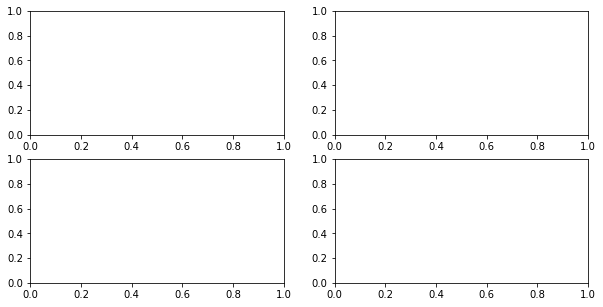

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

Co się wydarzyło?

Stworzyliśmy dwa główne rodzaje obiektów, które matplotlib wykorzystuje. Obiekt figure gromadzi w sobie wszystkie inne elementy związane z wizualizacją - np. wykresy, tytuły, legendy itp., natomiast obiekt Axes gromadzi informacje dotyczące pojedyńczego wykresu.

Pod spodem został tutaj użyty poznany już mechanizm rozpakowania tuple - plt.subplots zwraca wynik w postacie (figure, axes/axes array) - w tym przypadku było to (figure, axes array) ponieważ podaliśmy parametry, mówiące że chcemy mieć 4 podwykresy (2 na 2).

Zobaczmy jak dostać się do każdego z tych wykresów i jak zmodyfikować całość.

Numerujemy od 0:)


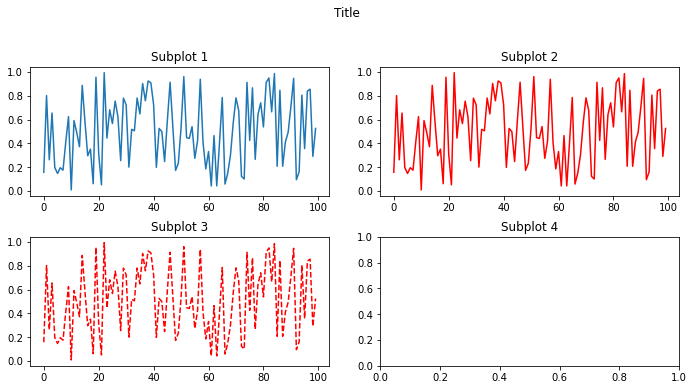

In [45]:
x_plot_data = np.arange(0, 100, 1)
y_plot_data = np.random.rand(10, 10).flatten()

# Po co pisac "_=ax.plot..."" ? funkcja plot zwraca informacje o wygenerowanym obiekcie, a jupyter notebook automatycznie to 
# printuje - chyba, że przechwycimy to w jakąś zmienną. Chwytliwa nazwa zmiennej "_" to konwencja - mówi tyle, że ta zmienna 
# nie będzie nigdzie wykorzystywana. Ostatni wykres zostawiam bez tego, żebyś zobaczył/a co mam na mysli.
# Jeżeli robimy tylko jeden plot w komórce, to wystarczy dać ";" na końcu - efekt będzie ten sam.

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
fig.tight_layout(pad=2) # ustawianie odstepu pomiedzy poszczegolnymi subplotami

# plotting
_ = ax[0, 0].plot(x_plot_data, y_plot_data) 
_ = ax[0, 1].plot(x_plot_data, y_plot_data, color='red')
ax[1, 0].plot(x_plot_data, y_plot_data, color='red', linestyle='--')

# labeling
_ = fig.suptitle("Title", y=1.1)
_ = ax[0, 0].set_title("Subplot 1")
_ = ax[0, 1].set_title("Subplot 2")
_ = ax[1, 0].set_title("Subplot 3")
_ = ax[1, 1].set_title("Subplot 4")

try:
    ax[2, 0].plot(x_plot_data, y_plot_data, color='red', linestyle='--')
except IndexError:
    print("Numerujemy od 0:)")

<b> UWAGA </b> Axes != Axis . 
Axes to obiekt zawierający obszar do plotowania, SKŁADAJĄCY się  m.in. (w przypadku 2D) z dwóch obiektów Axis - czyli osi. Obiekt Axis nie robi zbyt wiele prawdę mówiac, zajmuje się formatowaniem ticków (skalowaniem) na osiach i podpisem przy osi. Obiekt Axes natomiast, robi niemalże wszystko.

Przedstawione wyżej podejście do plotowania jest dość obiektowe - alternatywą jest zwyczajne wywoływanie funkcji plot i poleganie na wewnętrznych mechanizmach maptlotlib do zarządzania figure i axis. Poniżej przykład

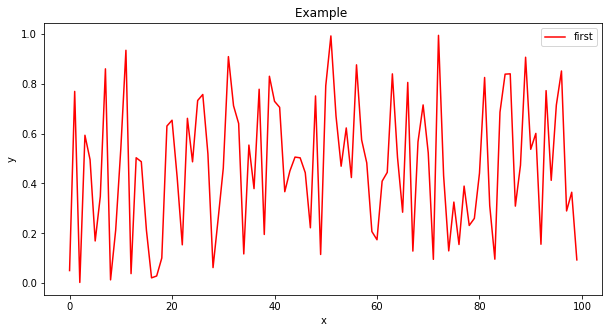

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(x_plot_data, y_plot_data, label='first', color='red', linestyle='-');
plt.title("Example ");
plt.xlabel('x');
plt.ylabel('y');
plt.legend();

Oczywiście drugie podejście jest szybsze i zajmuje mniej miejsca, a często jesteśmy w stanie wygenerować taki wykres bez korzystania z matplotliba bezpośrednio, a jedynie przez bibliotekę Pandas. Za dokumentacją matplotliba: 

"In general, we suggest using the OO style, particularly for complicated plots, and functions and scripts that are intended to be reused as part of a larger project." 

czyli dość klasycznie - jeżeli plot ma być skomplikowany, dopieszczony i potencjalnie wykorzystywany w przyszłosci - wybieramy podejście obiektowe - w 90% przypadków pracy z danymi (a przynajmniej na zajęciach na uczelni) wystarczy nam podejście funkcyjne.

##  Ćwiczenia
Wygeneruj rezultat zbliżony do tych poniżej.

In [26]:
# Bar plot data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [25, 40, 30, 50]

# Multiple plots data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y4 = np.log(x + 1)


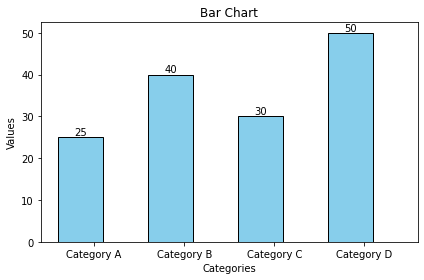

In [14]:
# ex1

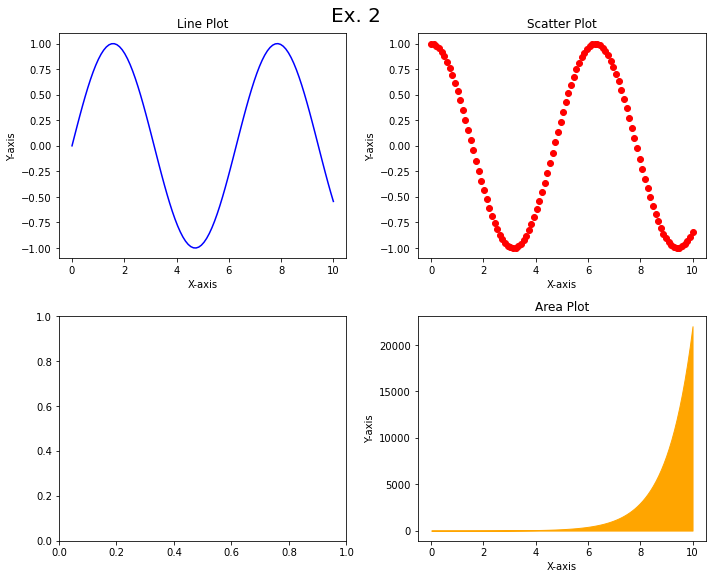

In [25]:
# ex2 

# Solutions to exercises

In [ ]:
# Matplotlib - ex1

# # Data
# categories = ['Category A', 'Category B', 'Category C', 'Category D']
# values = [25, 40, 30, 50]

# # Create a figure and axes
# fig, ax = plt.subplots()

# # Plot the data
# bars = ax.bar(categories, values)

# # Customize the appearance of the bars
# bar_color = 'skyblue'
# bar_width = 0.5
# bar_edge_color = 'black'
# for bar in bars:
#     _ = bar.set_color(bar_color)
#     _ = bar.set_width(bar_width)
#     _ = bar.set_edgecolor(bar_edge_color)

# # Add labels to the x-axis, y-axis, and chart title
# _ = ax.set_xlabel('Categories')
# _ = ax.set_ylabel('Values')
# _ = ax.set_title('Bar Chart')

# # Display the value of each bar on top of the bar
# for bar in bars:
#     height = bar.get_height()
#     _ = ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# # Adjust the layout to avoid cutting off labels
# plt.tight_layout()

# # Display the chart
# plt.show()

# Matplotlib - ex2

# Generate data
# x = np.linspace(0, 10, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)
# y4 = np.log(x + 1)

# # Create a figure with subplots
# fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# # Plot 1: Line plot
# _ =axes[0, 0].plot(x, y1, color='blue')
# _ =axes[0, 0].set_xlabel('X-axis')
# _ =axes[0, 0].set_ylabel('Y-axis')
# _ =axes[0, 0].set_title('Line Plot')

# # Plot 2: Scatter plot
# _ =axes[0, 1].scatter(x, y2, color='red', marker='o')
# _ =axes[0, 1].set_xlabel('X-axis')
# _ =axes[0, 1].set_ylabel('Y-axis')
# _ =axes[0, 1].set_title('Scatter Plot')

# # Plot 4: Area plot
# _ =axes[1, 1].fill_between(x, y3, color='orange')
# _ =axes[1, 1].set_xlabel('X-axis')
# _ =axes[1, 1].set_ylabel('Y-axis')
# _ =axes[1, 1].set_title('Area Plot')

# # Adjust layout and spacing
# plt.tight_layout()

# # Display the figure
# _ = fig.suptitle("Ex. 2", fontsize=20, y=1)
# plt.show()